In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [3]:

df=pd.read_csv(r"C:\Users\Downloads\advertising (2).csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
#Changing timeStamp to Day and Night
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']


0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [7]:
def classify_day_night(timestamp):
    hour = timestamp.hour
    if 6 <= hour < 18:
        return 1
    else:
        return 0

In [8]:
df['Period'] = df['Timestamp'].apply(classify_day_night)
df['Period']
df.drop(columns=['Timestamp'],axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Period
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,0


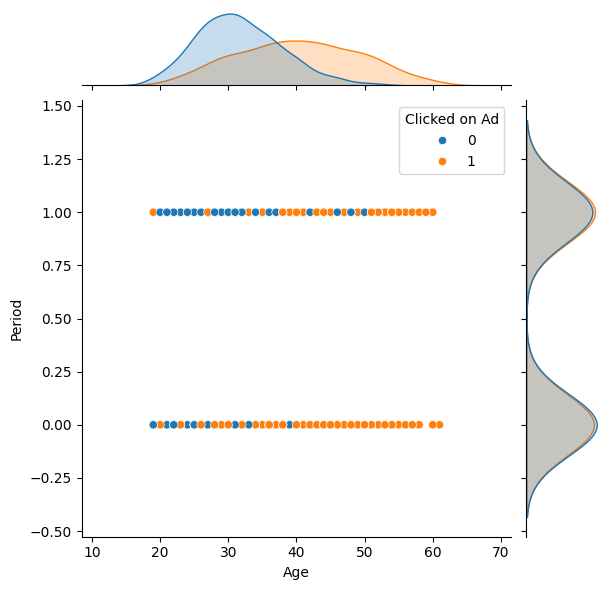

In [11]:
#Finding Different Relationships b/w columns¶
sns.jointplot(x='Age',y='Period',data=df,kind='scatter',hue="Clicked on Ad")

<Axes: xlabel='Age', ylabel='Count'>

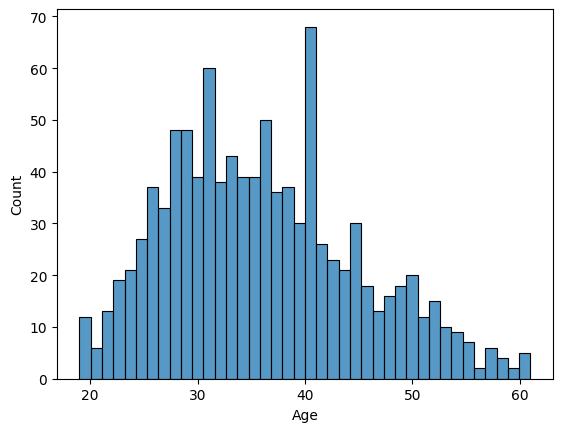

In [12]:
sns.histplot(df['Age'],bins=40)

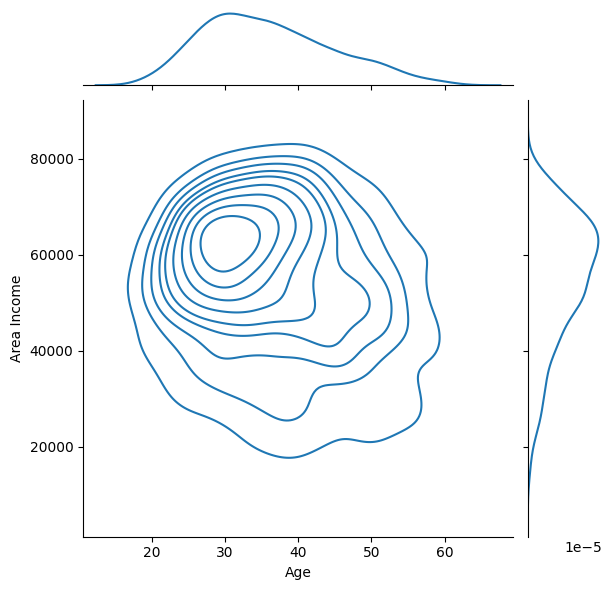

In [13]:
sns.jointplot(x='Age',y='Area Income',data=df,kind='kde')

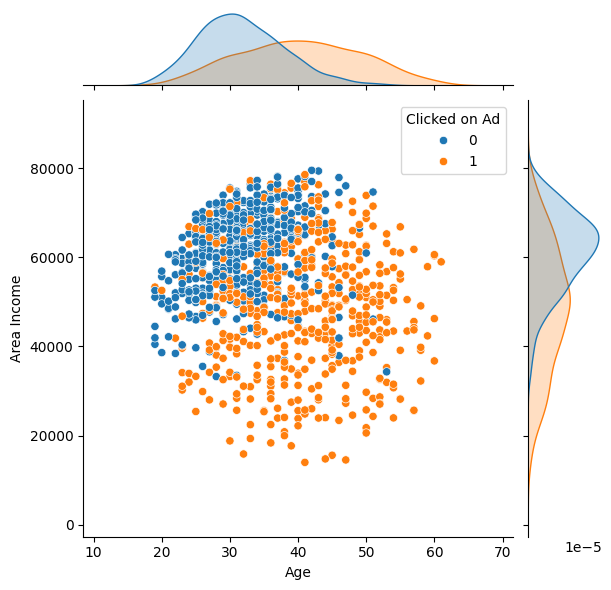

In [14]:
sns.jointplot(x='Age',y='Area Income',data=df,kind='scatter',hue="Clicked on Ad")

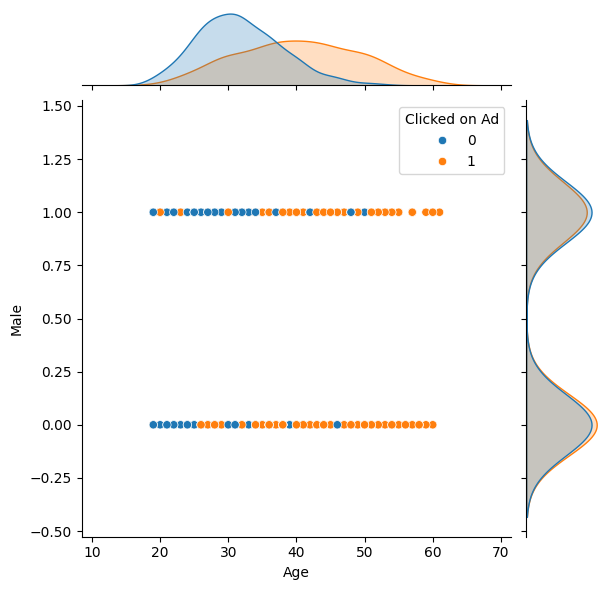

In [15]:
sns.jointplot(x='Age',y='Male',data=df,kind='scatter',hue="Clicked on Ad")

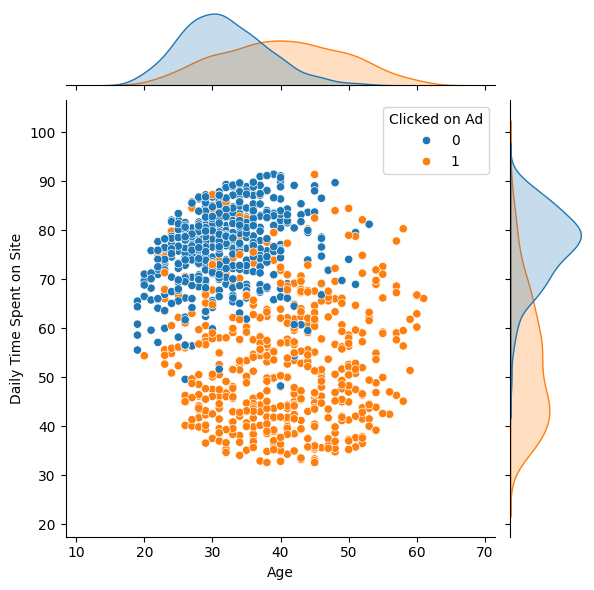

In [16]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='scatter',hue="Clicked on Ad")

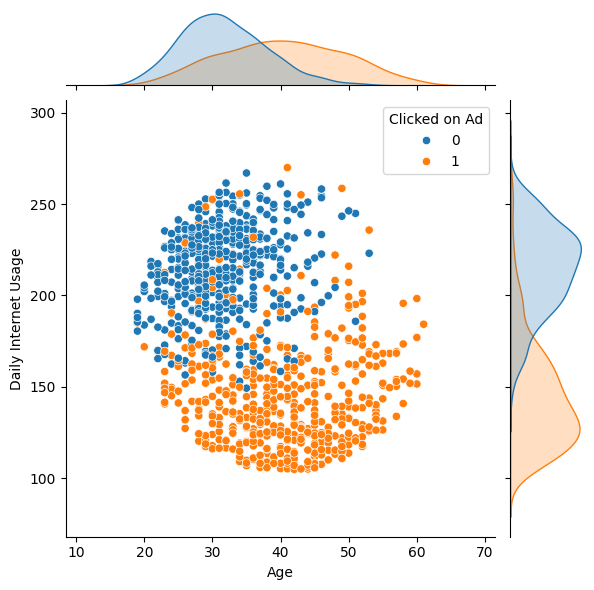

In [17]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=df,kind='scatter',hue="Clicked on Ad")

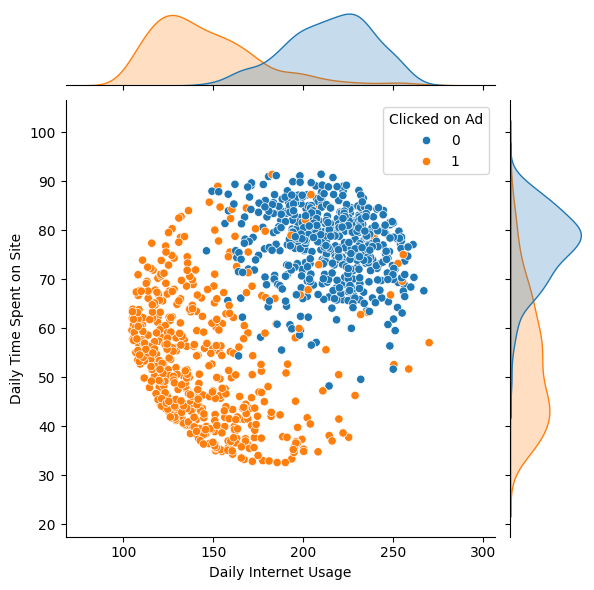

In [18]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=df,kind='scatter',hue="Clicked on Ad")

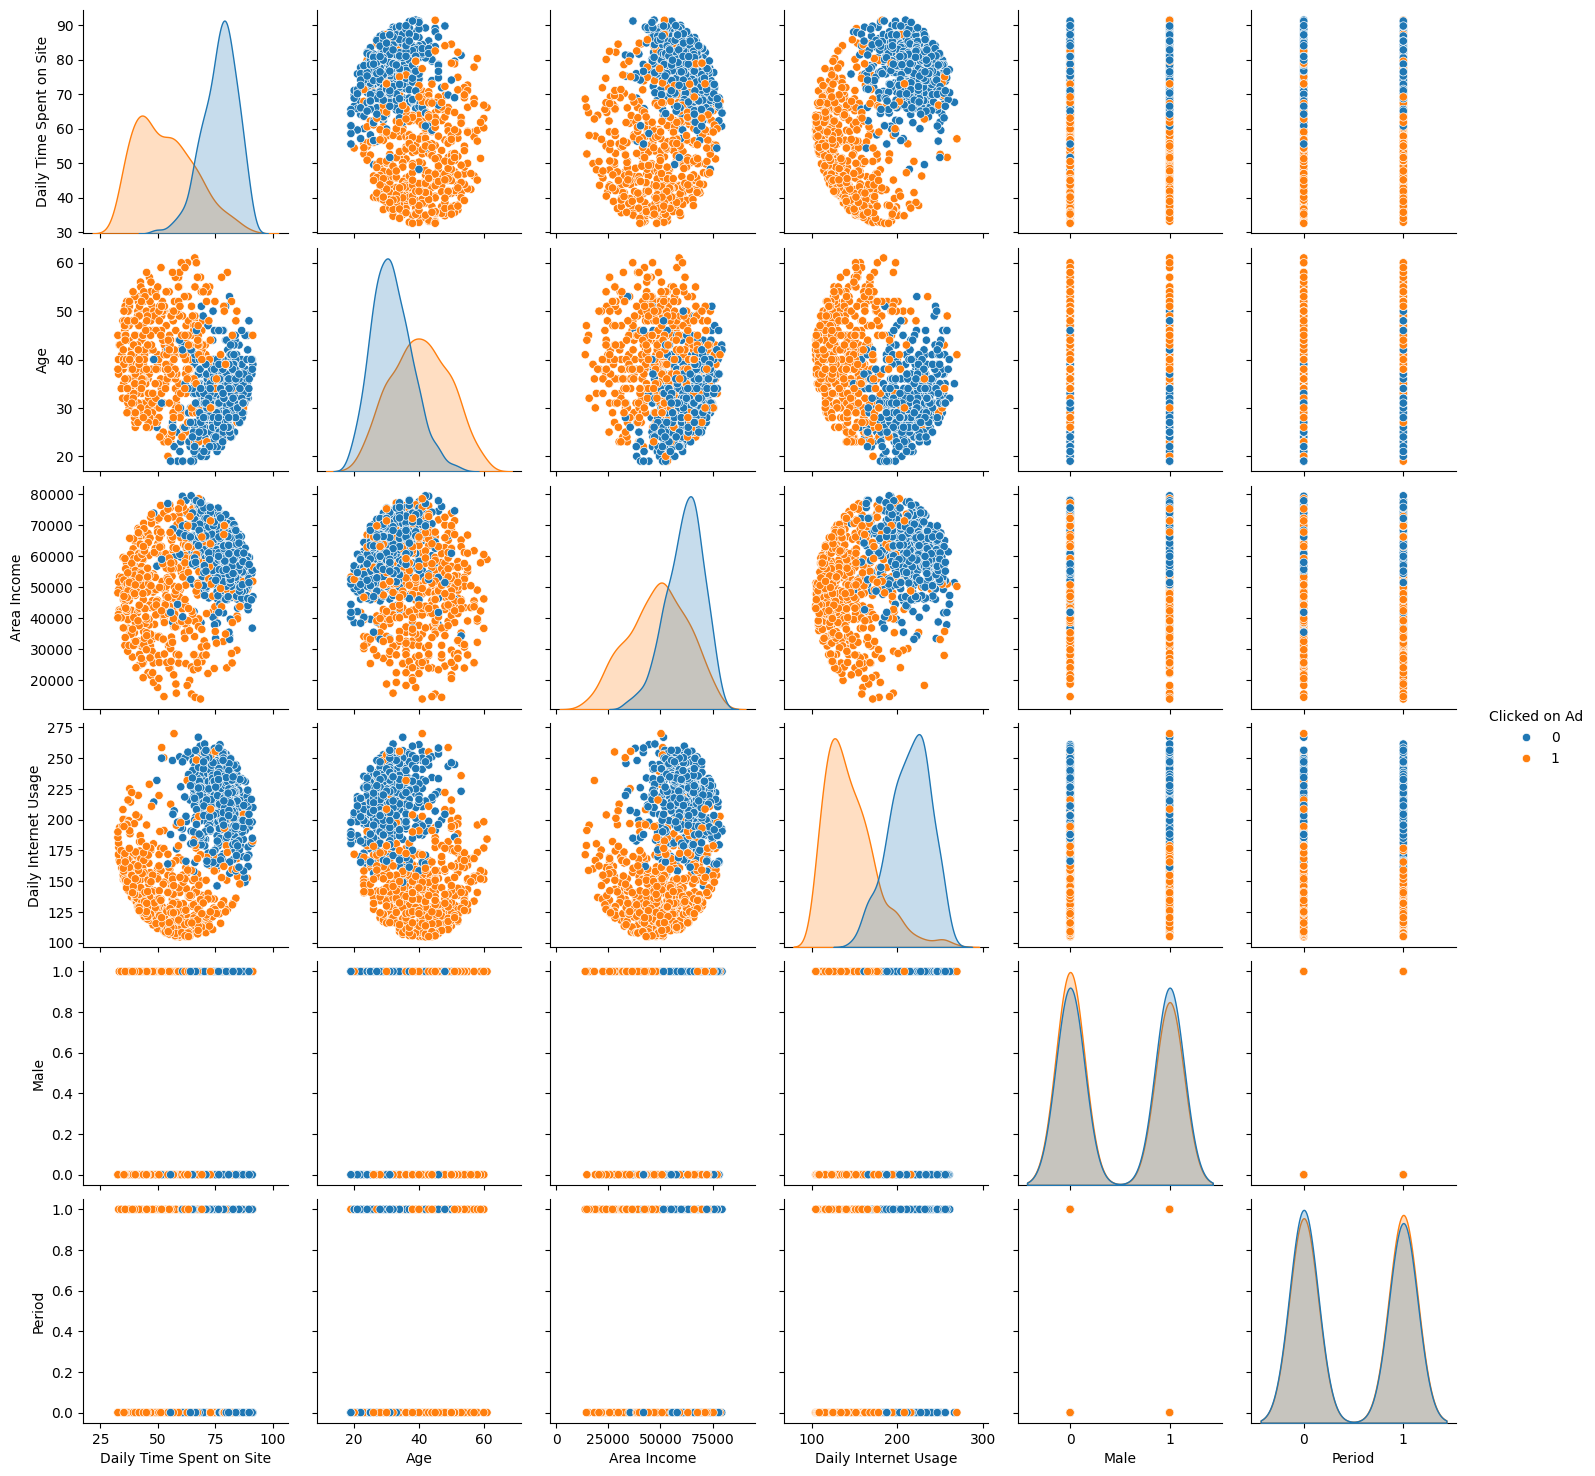

In [22]:
sns.pairplot(df,hue="Clicked on Ad")

In [21]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Period'],
      dtype='object')

In [23]:
#Dropping extra Columns¶
col_to_drop=['Ad Topic Line', 'City',  'Country',"Timestamp"]
new_df=df.drop(columns=col_to_drop,axis=1)
new_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Period
0,68.95,35,61833.90,256.09,0,0,0
1,80.23,31,68441.85,193.77,1,0,0
2,69.47,26,59785.94,236.50,0,0,0
3,74.15,29,54806.18,245.89,1,0,0
4,68.37,35,73889.99,225.58,0,0,0


In [24]:
#Splitting Dataset

In [25]:
y=new_df['Clicked on Ad']
X=new_df.drop(columns=['Clicked on Ad'],axis=1)
print(X.head(4))
print(y.head(4))

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   

   Period  
0       0  
1       0  
2       0  
3       0  
0    0
1    0
2    0
3    0
Name: Clicked on Ad, dtype: int64


In [26]:
#Using Logistic Regression¶
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [27]:
model=LogisticRegression(max_iter=1000,solver='lbfgs')
model.fit(X_test,y_test)

LogisticRegression(max_iter=1000)

In [28]:
predictions=model.predict(X_test)

In [29]:
#Finding where actual values differ from Predicted¶
pre_arr=np.array(predictions)
y_test_arr=np.array(y_test)
mismatch=np.where(pre_arr!=y_test_arr)[0]
for i in mismatch:
    print(f"Index  {i}: Actual Prediction : {y_test_arr[i]} v/s Model predicts : {pre_arr[i]}")

Index  31: Actual Prediction : 0 v/s Model predicts : 1
Index  42: Actual Prediction : 1 v/s Model predicts : 0
Index  75: Actual Prediction : 1 v/s Model predicts : 0
Index  86: Actual Prediction : 0 v/s Model predicts : 1
Index  94: Actual Prediction : 1 v/s Model predicts : 0
Index  95: Actual Prediction : 0 v/s Model predicts : 1
Index  133: Actual Prediction : 1 v/s Model predicts : 0
Index  148: Actual Prediction : 1 v/s Model predicts : 0
Index  189: Actual Prediction : 0 v/s Model predicts : 1
Index  190: Actual Prediction : 1 v/s Model predicts : 0
Index  220: Actual Prediction : 1 v/s Model predicts : 0
Index  305: Actual Prediction : 1 v/s Model predicts : 0


Text(0.5, 1.0, 'Actual vs Predicted Values with Misclassified Points Highlighted')

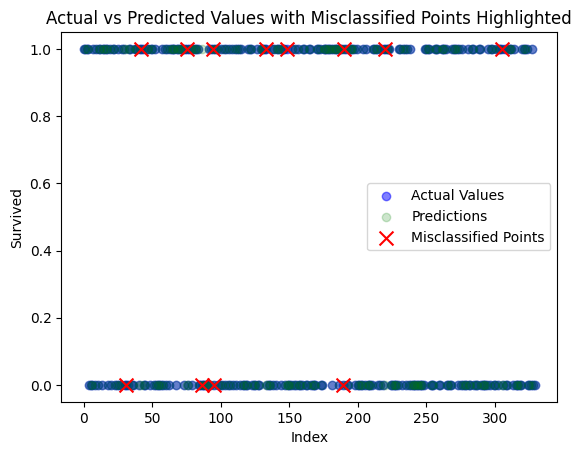

In [30]:
plt.scatter(range(len(y_test_arr)), y_test_arr, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(len(y_test_arr)), pre_arr, color='green', label='Predictions', alpha=0.2)

plt.scatter(mismatch, y_test_arr[mismatch], color='red', label='Misclassified Points', marker='x', s=100)

plt.xlabel('Index')
plt.ylabel('Survived')
plt.legend()
plt.title('Actual vs Predicted Values with Misclassified Points Highlighted')

In [31]:
#Evalvating result¶
metrics.mean_squared_error(y_test,predictions)


np.float64(0.03636363636363636)

In [33]:
metrics.mean_absolute_error(y_test,predictions)


np.float64(0.03636363636363636)

In [35]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       162
           1       0.98      0.95      0.96       168

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



In [36]:
print(metrics.confusion_matrix(y_test,predictions))

[[158   4]
 [  8 160]]


In [37]:
model.score(X_test,y_test)

0.9636363636363636

In [39]:
#Standardization¶
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1500, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1500)

In [40]:
predictions=log_reg.predict(X_test_scaled)
score = log_reg.score(X_test_scaled, y_test)
print(f'Accuracy: {score}')

Accuracy: 0.9727272727272728


In [41]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       162
           1       0.99      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [42]:
print(metrics.confusion_matrix(y_test,predictions))

[[160   2]
 [  7 161]]


In [ ]:
# Conclusion
# ### Model Used: Logistic Refression
# ### Accuracy : 97